# Session 10 : File Handling + Serialization & Deserialization
https://www.youtube.com/watch?v=o-TAYRMQzIQ&t=1704s

## Topics:

### 1. File handling

### 2. Serialization and Deserialization

### 3. Pickling

### 4. Recursion

### 5. Memoization

### Some Theory

##### Types of data used for I/O:
- Text - '12345' as a sequence of unicode chars
- Binary - 12345 as a sequence of bytes of its binary equivalent

##### Hence there are 2 file types to deal with
- Text files - All program files are text files
- Binary Files - Images,music,video,exe files

### How File I/O is done in most programming languages

- Open a file
- Read/Write data
- Close the file

### Writing a file :

#### case 1 - if the file is not present : 

In [24]:
f = open('sample.txt','w')
f.write('Hello world')
f.close()

In [25]:
f = open('sample1.txt','w')
f.write('Hello world')
f.close()
f.write('Mohit')

# will throw error as file is already closed and we cannot write to a closed file

ValueError: I/O operation on closed file.

#####  write multiline strings : 

In [26]:
f = open('sample1.txt','w')
f.write('hello world')
f.write('\n how are you?')
f.close()

#### case 2 - if the file is already present :


In [27]:
f = open('sample.txt','w')
f.write(' SRK ')
f.close()

# NOTE : Old content has been replaced with the new lines

#### writing multiple lines together : 

In [6]:
L = ['i\n','am\n','night\n', 'I am vengence\n','i am\n','Batman\n']

f = open('sample2.txt','w')
f.writelines(L)
f.close()

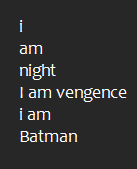

### NOTE : <span class="girk">if we try to write on an already existing file, everything in it will be deleted. New content will overrite it</span>

###  introducing append mode : 'a'

In [7]:
f = open("D:\Python\File Handling\sample2.txt",'a')
f.write('\n I am fine')
f.close()

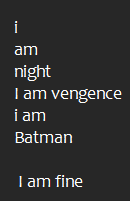

#### appending multiple lines toegther:

In [5]:
L = ['hello','hi','how are you', 'I ma fine','Thankyou']

with open("D:\Python\File Handling\sample2.txt", 'a') as file:
    for line in L:
        file.write(line + '\n')

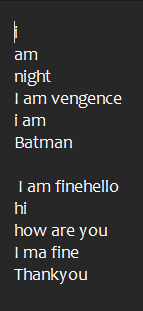

## Reading a file :

- __read():__ This method is used to read the entire content of a file as a string. The syntax for read() is:

- __readline():__ This method is used to read a single line from a file. 

- __readlines():__ This method is used to read all the lines of a file and return them as a __list of strings.__

__Overall, the read() method is useful when you want to read the entire content of a file as a single string, while readline() and readlines() are useful when you want to read the file line by line__

In [31]:
f = open('sample.txt','r')
s = f.read()
print(s)
f.close()

 SRK 
 I am finehello
hi
how are you
I ma fine
Thankyou



##### reading first 10 characters :

In [32]:
f = open('sample.txt','r')
s = f.read(10)
print(s)
f.close()

 SRK 
 I a


##### reading lines one by one

In [33]:
f = open('sample.txt','r')
print(f.readline())
print(f.readline())
f.close()

 SRK 

 I am finehello



#### `end=''` line won't change

In [34]:
f = open('sample.txt','r')
print(f.readline(),end='')
print(f.readline())
f.close()

 SRK 
 I am finehello



##### reading entire file using readline : 

In [35]:
f = open('sample.txt','r')

while True:
    
    data = f.readline()

    if data == '':
        break
    else:
        print(data,end='')

f.close()

 SRK 
 I am finehello
hi
how are you
I ma fine
Thankyou


## Using Context Manager (With) : file closes automatically

- It's a good idea to close a file after usage as it will free up the resources
- If we dont close it, garbage collector would close it
- with keyword closes the file as soon as the usage is over

#### rewriting using with

In [4]:
with open('sample2.txt','w') as f:
    f.write('superman')

#### reading using with : 

In [37]:
with open ('sample.txt','r') as f:
    print(f.read())

 SRK 
 I am finehello
hi
how are you
I ma fine
Thankyou



In [1]:
with open ('sample.txt','r') as f:
    print(f.readline())
    print(f.readline())

 SRK 

 I am finehello



In [2]:
with open ('sample.txt','r') as f:
    print(f.readline(),end='')
    print(f.readline())

 SRK 
 I am finehello



##### reading first 10 charcaters then next 10 : 

In [43]:
with open('sample.txt','r') as f:
    print(f.read(10)) # first 10 characters
    print(f.read(10)) # next 10 charcaters

 SRK 
 I a
m finehell


### to load a big file in memory

In [21]:
big_L = ['Mr. Abhay Deeip (1997-99 Batch) & Founder Director Indicosmic Capital Joins In As Alumni Mentor For The Flagship Konfidant Programme Of KSOMMr Abhay Deeip, Alumnus 99 Batch, School of Management has joined as an Alumni Mentor for the Konfidant Mentoring Programme, which focuses on building mentor-mentee relationships and helps incubate the mentees’ interpe...KIIT Alumni Invited As Judges For The Event K-Star Season 3 By KSACBehold the illustrious panel of judges for the grand event, K-Star Season 3 hosted by KIIT Student Activity centre (KSAC)! It was wonderful to have these distinguished individuals, each a paragon of talent and accomplishment, all proud alumni of KIIT.']

with open('big.txt','w') as f:
    f.writelines(big_L)

#### loading it in chunks:

In [23]:
with open('big.txt','r') as f:
    
    chunk_size = 11
    
    while len(f.read(chunk_size)) > 0:
        print(f.read(chunk_size),end='** ')

eeip (1997-**  Founder Di** cosmic Capi** n As Alumni**  The Flagsh** t Programme** Abhay Deeip** 9 Batch, Sc** agement has** an Alumni M** he Konfidan**  Programme,** ses on buil** -mentee rel** and helps i**  mentees’ i** IT Alumni I** udges For T** Star Season** ehold the i** panel of ju** e grand eve** Season 3 ho** T Student A** tre (KSAC)!** derful to h** istinguishe** ls, each a ** talent and ** ent, all pr** of KIIT.** 

In [25]:
big_L = ['hello world' for i in range(1000)]

with open('big.txt','w') as f:
    f.writelines(big_L)

In [26]:
with open('big.txt','r') as f:
    
    chunk_size = 11
    
    while len(f.read(chunk_size)) > 0:
        print(f.read(chunk_size),end='** ')
        f.read(chunk_size) # load next chunk using it, otherwise current chunk will keep on priniting

hello world** hello world** hello world** hello world** hello world** hello world** hello world** hello world** hello world** hello world** hello world** hello world** hello world** hello world** hello world** hello world** hello world** hello world** hello world** hello world** hello world** hello world** hello world** hello world** hello world** hello world** hello world** hello world** hello world** hello world** hello world** hello world** hello world** hello world** hello world** hello world** hello world** hello world** hello world** hello world** hello world** hello world** hello world** hello world** hello world** hello world** hello world** hello world** hello world** hello world** hello world** hello world** hello world** hello world** hello world** hello world** hello world** hello world** hello world** hello world** hello world** hello world** hello world** hello world** hello world** hello world** hello world** hello world** hello world** hello world** hello world** hello 

## SEEK and TELL function 

seek() and tell() are methods that are used to manipulate the file pointer when working with files.

- __seek()__ 

    - changes the position of the file pointer
    
    - The origin parameter can be set to 0 (start of the file), 1 (current position), or 2 (end of the file). The seek() method is commonly used when you want to read or write a file from a specific position rather than from the beginning or end of the file.
 
 
 
- __tell() :__ 

    - returns the current position of the file pointer.
    
    - The tell() method is commonly used when you need to remember the current position of the file pointer for future operations, such as when you want to seek to that position later.

In [51]:
with open('sample.txt','r') as f:
    print(f.read(10)) # first 10 characters


 SRK 
 I a


##### tell : 

In [53]:
with open('sample.txt','r') as f:
    print(f.read(10)) # first 10 characters
    print('next character to be printed: ',f.tell())

 SRK 
 I a
next character to be printed:  11


##### seek + tell:

In [55]:
with open('sample.txt','r') as f:
    print(f.read(10)) # first 10 characters
    print('next character to be printed: ',f.tell())
    f.seek(0)
    print(f.read(10))
    print('next character to be printed: ',f.tell())

 SRK 
 I a
next character to be printed:  11
 SRK 
 I a
next character to be printed:  11


In [63]:
with open('sample.txt','r') as f:
    print(f.read(25)) # first 15 characters
    print('next character to be printed: ',f.tell())
    f.seek(0)
    print()
    print(f.read(10))
    print('next character to be printed: ',f.tell())


 SRK 
 I am finehello
hi

next character to be printed:  28

 SRK 
 I a
next character to be printed:  11


### seek during write:

In [33]:
with open('sample1.txt','w') as f:
    f.write('heyyyy')
    f.seek(0)
    f.write('X')
    

    
with open('sample1.txt','r') as f:
    print('output is: ',f.read())

output is;  Xeyyyy


In [35]:
with open('sample1.txt','w') as f:
    f.write('heyyyyyyy')
    f.seek(0)
    f.write('Xoxo')

with open('sample1.txt','r') as f:
    print('output is: ',f.read())

output is:  Xoxoyyyyy


### Problems with working in text mode

- can't work with binary files like images but has a solution. 
>we wil use 'wb' instead of 'w'


- not good for other data types like int/float/list/tuples

In [67]:
with open("D:\Python\File Handling\lags12.jpg",'r') as f:
    f.read()
    
# will throw error

UnicodeDecodeError: 'charmap' codec can't decode byte 0x81 in position 287: character maps to <undefined>

### reading binary files :

##### read and write, making  a copy of a file

In [69]:
with open('D:\Python\File Handling\lags12.jpg','rb') as f: # read binary
    with open('D:\Python\File Handling\cop_of_a_file.png','wb') as wf: # write binary
        wf.write(f.read())

#### working with other datatypes

In [70]:
with open('sample1.txt','w') as f:
    f.write(6)
    
# will throw error as 5 is an integer

TypeError: write() argument must be str, not int

In [71]:
with open('sample1.txt','w') as f:
    f.write('6')

In [72]:
with open('sample1.txt','r') as f:
    print(f.read() + 5)
    
# will throw error

TypeError: can only concatenate str (not "int") to str

In [75]:
# converting string to integer

with open('sample1.txt','r') as f:
    print(int(f.read()) + 5)

11


### NOTE : while writing anything to a file the datatype shoud be string, it cannot write int,list,dictionary etc in the file

In [77]:
d = {
    
    'name':'nitish',
    'age' : 33,
    'gender' : 'male'
}
d

{'name': 'nitish', 'age': 33, 'gender': 'male'}

In [79]:
with open('sample1.txt','w') as f:
    f.write(d)

    # will throw error as d is a dictionary not string

TypeError: write() argument must be str, not dict

In [80]:
# converting d to string

with open('sample1.txt','w') as f:
    f.write(str(d))

In [82]:
with open('sample1.txt','r') as f:
    print(f.read())

{'name': 'nitish', 'age': 33, 'gender': 'male'}


In [83]:
with open('sample1.txt','r') as f:
    print(f.read())
    print(type(f.read()))

{'name': 'nitish', 'age': 33, 'gender': 'male'}
<class 'str'>


In [84]:
# trying to convert it to dictinoary again to perform some actions:

with open('sample1.txt','r') as f:
    print(dict(f.read()))
    print(type(f.read()))
    
# will throw error

ValueError: dictionary update sequence element #0 has length 1; 2 is required

### NOTE : we cannot store complex datatypes in a  file using text. While reading we won't get the same dataype.

___

# Serialization and Deserialization

- **Serialization** - process of converting python data types to JSON format


- **Deserialization** - process of converting JSON to python data types

#### What is JSON?


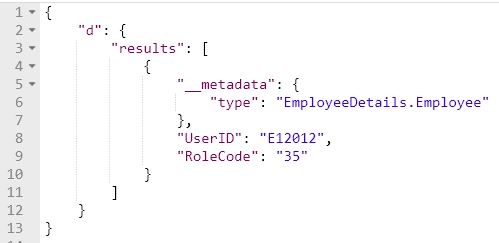

In [37]:
import json

#### writing file:

In [86]:
L = [1,2,3,4,5]

with open('demo.json','w') as f:
    json.dump(L,f)                         # json.dump(kya dump karn hai, file handler oject)
    

In [44]:
d = {
    
    'name':'nitish',
    'age' : 33,
    'gender' : 'male'
}

print(d)


with open('demo.json','w') as f:
    json.dump(d,f)

{'name': 'nitish', 'age': 33, 'gender': 'male'}


In [45]:
d = {
    
    'name':'nitish',
    'age' : 33,
    'gender' : 'male'
}

print(d)


with open('demo.json','w') as f:
    json.dump(d,f,indent=4)

{'name': 'nitish', 'age': 33, 'gender': 'male'}


### deserialisation : 

##### for dictionary

In [93]:
with open('demo.json','r') as f:
    d = json.load(f)
    print(d)
    print(type(d)) # datatype is not changing here

{'name': 'nitish', 'age': 33, 'gender': 'male'}
<class 'dict'>


#####  for tuple

In [53]:
t = (1,2,3,4,5)

with open('demo1.json','w') as f:
    json.dump(t,f)

<_io.TextIOWrapper name='demo1.json' mode='r' encoding='cp1252'>


### NOTE : in deserialisation for tuple, the resultant data type changes to list from tuple.

In [52]:
# serialize and deserialize a nested dict

d = {
    'student':'nitish',
     'marks':[23,14,34,45,56]
}

with open('demo2.json','w') as f:
    json.dump(d,f)

### Serializing and Deserializing custom objects

In [98]:
class Person:
    
    def __init__(self,fname,lname,age,gender):
        self.fname = fname
        self.lname = lname
        self.age = age
        self.gender = gender

# format to printed in
# -> Nitish Singh age -> 33 gender -> male

In [99]:
person = Person('Nitish','Singh',33,'male')

In [102]:
with open('demo4.json','w') as f:
    json.dump(person, f)
    
# will throw error as you need to specify how to want to serialise your custom objects.

TypeError: Object of type Person is not JSON serializable

#### correct way : 

In [54]:
class Person:
    
    def __init__(self,fname,lname,age,gender):
        self.fname = fname
        self.lname = lname
        self.age = age
        self.gender = gender

# format to printed in
# -> Nitish Singh age -> 33 gender -> male

In [55]:
person = Person('Nitish','Singh',33,'male')

In [56]:
# As a string
import json

def show_object(person): # aisa dikhega
    if isinstance(person,Person):
        return "{} {} age -> {} gender -> {}".format(person.fname,person.lname,person.age,person.gender)

with open('demo4.json','w') as f:
    json.dump(person,f,default=show_object) # parameter to specify

In [60]:
with open('demo4.json','r') as f:
    print(f.read())

"Nitish Singh age -> 33 gender -> male"


In [58]:
# deserialising As a dict
import json

def show_object(person):
    if isinstance(person,Person):
        return {'name':person.fname + ' ' + person.lname,'age':person.age,'gender':person.gender}

with open('demo5.json','w') as f:
    json.dump(person,f,default=show_object,indent=4)

In [59]:
with open('demo5.json','r') as f:
    d = json.load(f)
    print(d)
    print(type(d))

{'name': 'Nitish Singh', 'age': 33, 'gender': 'male'}
<class 'dict'>


## Pickling

`Pickling` is the process whereby a Python object hierarchy is converted into a byte stream, and `unpickling` is the inverse operation, whereby a byte stream (from a binary file or bytes-like object) is converted back into an object hierarchy.

In [109]:
import pickle

In [110]:
class Person:
    
    
    def __init__(self,name,age):
        self.name = name
        self.age = age

    def display_info(self):
        print('Hi my name is',self.name,'and I am ',self.age,'years old')

In [115]:
p = Person('nitish',33)

print(p.display_info())

Hi my name is nitish and I am  33 years old
None


### pickle dump

In [116]:
with open('person.pkl','w') as f:
    pickle.dump(p,f)
    
# will throw error as pickle doesnot have 'w' mode, it has 'wb' mode

TypeError: write() argument must be str, not bytes

In [117]:
with open('person.pkl','wb') as f:
    pickle.dump(p,f)

###  pickle load

In [118]:
with open('person.pkl','rb') as f:
    p = pickle.load(f)

p.display_info()

Hi my name is nitish and I am  33 years old


### Pickle Vs Json

- Pickle lets the user to store data in binary format. JSON lets the user store data in a human-readable text format.

### Alternative is joblib to export model : https://www.youtube.com/watch?v=YyvdWDIpafM

---
---
---

# Recursion using Python

https://www.youtube.com/watch?v=cNvZK0Wyoik

It is a technique where a function calls itself.


we always find base case first. base means jiska result we already know

#### multiplication of 2 number using loops : 

In [121]:
def multiply(a,b):
    
    result = 0
    
    for i in range(b):
        result = result + a
        
    print(result)

In [122]:
multiply(5,4)

20


#### multiplication of 2 number using recursion : 

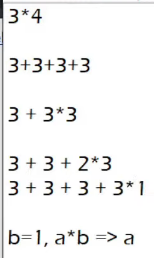

base case is b =1 , a*b =>a

when b = 1 product (b*a) will always be = a

In [123]:
def mul(a,b):
    
    if b==1:
        return a 
    else:
        return a + mul(a,b-1)
    
print(mul(5,6))

30


### It is very close to stacks in data structure i.e last in first out

#### factorial using recursion : 

In [125]:
# base case is 1!=1

def fact(num):
    if num ==1:
        return 1
    else:
        # 5 = 5*4!
        return num*fact(num-1)
    
print(fact(5))

120


#### palindrome or not

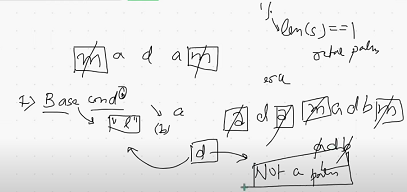


In [136]:
# any string having 1 character is a palindrome
# base case, if len(s)==1, retunr palindrome

def palin(text):
    if len(text) <=1:
        print("palindrome")
        
    else:
        if text[0] == text[-1]:
            palin(text[1:-1])
        else:
            print('not a palindrome')

In [137]:
palin('malayalam')

palindrome


In [138]:
palin('madam')

palindrome


In [139]:
palin('python')

not a palindrome


In [140]:
# but fails here
palin('poop')

palindrome


### Rabbit problem
It was about how fast rabbits could breed in ideal circumstances.

Suppose a newly-born pair of rabbits, one male, one female, are put in a field. 

Rabbits are able to mate at the age of one month so that at the end of its second month a female can produce another pair of rabbits. 

Suppose that our rabbits never die and that the female always produces one new pair (one male, one female) every month from the second month on.


__How many pairs will there be in one year?__

In [147]:
import time

def fib(m):
    if m==0 or m==1:
        return 1
    else:
        return fib(m-1) + fib(m-2)
start = time.time()    
print(f'pair of rabbits after 12 months = {fib(12)}')

print(time.time()-start)

pair of rabbits after 12 months = 233
0.0009875297546386719


In [154]:
import time

def fib(m):
    if m==0 or m==1:
        return 1
    else:
        return fib(m-1) + fib(m-2)
start = time.time()    


print(f'pair of rabbits after 36 months = {fib(36)}')
print('time taken', time.time()-start)

pair of rabbits after 36 months = 24157817
time taken 7.96854043006897


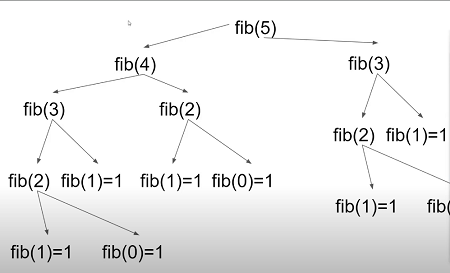

__code is ineeficient as time complexity is way too high (2^n)__

eg : for calulation fibonacci of 5 we are calulating fibonacci of 4 then fibonacci of 3 then fibonacci of 2. That's why it is taking time.

### to reduce time:
__it can be made faster if we store the fibonacci values of previous number somewhere__

## This is called Memorisation

In [155]:
# using dynamic programming
import time

def memo(m,dictionary):
    
    if m in dictionary:
        return dictionary[m]
    else:
        dictionary[m] = memo(m-1,dictionary) + memo(m-2,dictionary)
        
        return dictionary[m]

dictionary = {0:1,1:1}

start = time.time()   

print(memo(36,dictionary))

print('time taken',time.time()-start)

24157817
time taken 0.0


In [158]:
print(memo(100,dictionary))

573147844013817084101


In [159]:
print(dictionary)

{0: 1, 1: 1, 2: 2, 3: 3, 4: 5, 5: 8, 6: 13, 7: 21, 8: 34, 9: 55, 10: 89, 11: 144, 12: 233, 13: 377, 14: 610, 15: 987, 16: 1597, 17: 2584, 18: 4181, 19: 6765, 20: 10946, 21: 17711, 22: 28657, 23: 46368, 24: 75025, 25: 121393, 26: 196418, 27: 317811, 28: 514229, 29: 832040, 30: 1346269, 31: 2178309, 32: 3524578, 33: 5702887, 34: 9227465, 35: 14930352, 36: 24157817, 37: 39088169, 38: 63245986, 39: 102334155, 40: 165580141, 41: 267914296, 42: 433494437, 43: 701408733, 44: 1134903170, 45: 1836311903, 46: 2971215073, 47: 4807526976, 48: 7778742049, 49: 12586269025, 50: 20365011074, 51: 32951280099, 52: 53316291173, 53: 86267571272, 54: 139583862445, 55: 225851433717, 56: 365435296162, 57: 591286729879, 58: 956722026041, 59: 1548008755920, 60: 2504730781961, 61: 4052739537881, 62: 6557470319842, 63: 10610209857723, 64: 17167680177565, 65: 27777890035288, 66: 44945570212853, 67: 72723460248141, 68: 117669030460994, 69: 190392490709135, 70: 308061521170129, 71: 498454011879264, 72: 806515533049

### power set :

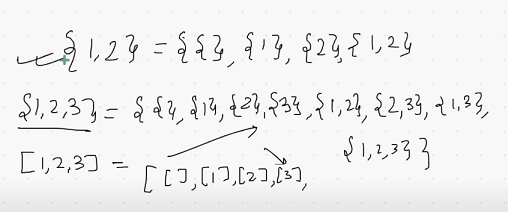

#### power set solution : 

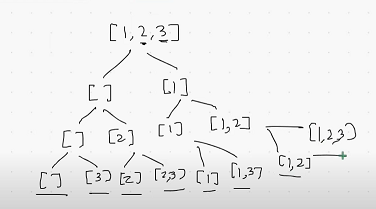